1. softmax Regression 
과제에서 tf.keras를 사용했는데 그냥 keras를 사용하면 계속 오류가 나와 
교수님에게 양해를 구하고 tf.keras를 사용했습니다.

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
mnist = tf.keras.datasets.mnist

In [24]:
mnist = tf.keras.datasets.mnist
(x_train, y), (x_test, y_test) = mnist.load_data()
y1_train=to_categorical(y)
y1_test=to_categorical(y_test)
x1_train=x_train.reshape(60000,28*28)
x1_train = x1_train/260

x1_test = x_test.reshape((10000, 28*28))
x1_test = x1_test/260

In [25]:
y1_test.shape

(10000, 10)

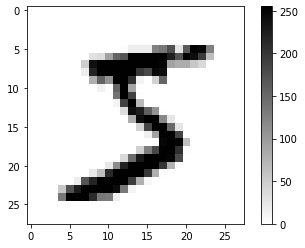

In [26]:
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()



In [27]:

net = tf.keras.models.Sequential()
net.add(tf.keras.layers.Dense(10, activation='softmax', input_shape=(28*28,))) 
net.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
net.fit(x1_train, y1_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.7974 - accuracy: 0.8116
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4599 - accuracy: 0.8800
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4058 - accuracy: 0.8917
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3788 - accuracy: 0.8968
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3618 - accuracy: 0.9005
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3496 - accuracy: 0.9036
Epoch 7/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3405 - accuracy: 0.9058
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3333 - accuracy: 0.9075
Epoch 9/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3274 - accuracy: 0.9089
Epoch 10/10
60

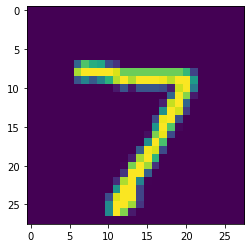

In [29]:
plt.imshow(x_test[0])

In [30]:
np.argmax(net.predict(x1_test)[0])

7

In [31]:
y_test[8]

5

In [32]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
net.evaluate(x1_test,y1_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3063218157470226, 0.9167]

2. support vector Machine

In [17]:
from sklearn.svm import SVC

In [21]:
x2_train = x1_train[:3000]
y2_train = y[:3000]# 60000개를 학습시키기엔 너무 로딩이 오래걸려 3000개만 했습니다.

In [22]:
clf=SVC(kernel='rbf',gamma='auto')
clf.fit(x2_train,y2_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
clf.score(x1_test,y_test)

0.8928

3. randomforest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [37]:
clf2=RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

In [40]:
clf2.fit(x1_train,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
clf2.score(x1_test,y_test)

0.8272